<a href="https://colab.research.google.com/github/majid-zamani/CS-SBU-DataMining-Msc-projects/blob/main/MajidMohamadzamani-99422172/Project01/DS_Project01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats 
import urllib 

In [46]:
DataFile = pd.read_csv('./Files/AB_NYC_2019.csv')
print(DataFile.head())

     id  ... availability_365
0  2539  ...              365
1  2595  ...              355
2  3647  ...              365
3  3831  ...              194
4  5022  ...                0

[5 rows x 16 columns]


In [47]:
DataFile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [49]:
print('Rows     :',DataFile.shape[0])
print('Columns  :',DataFile.shape[1])
print('\nFeatures :\n     :',DataFile.columns.tolist())
print('\nMissing values    :',DataFile.isnull().values.sum())
print('\nUnique values :  \n',DataFile.nunique())


Rows     : 48895
Columns  : 16

Features :
     : ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

Missing values    : 20141

Unique values :  
 id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: i

<Figure size 720x432 with 0 Axes>

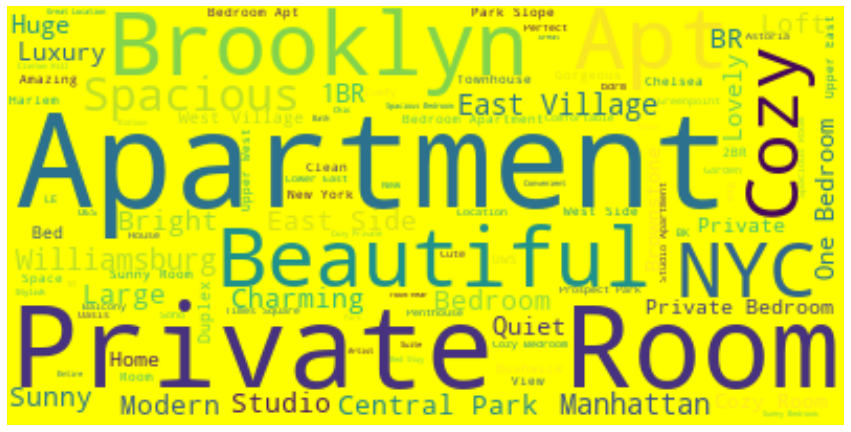

In [6]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in DataFile.name)
wordcloud = WordCloud(max_words=100, background_color="yellow").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [54]:
DataFile.describe().T.round(decimals=1)


,count,mean,std,min,25%,50%,75%,max
id,48895.0,19017143.2,10983108.4,2539.0,9471945.0,19677284.0,29152178.5,36487245.0
host_id,48895.0,67620010.6,78610967.0,2438.0,7822033.0,30793816.0,107434423.0,274321313.0
latitude,48895.0,40.7,0.1,40.5,40.7,40.7,40.8,40.9
longitude,48895.0,-74.0,0.0,-74.2,-74.0,-74.0,-73.9,-73.7
price,48895.0,152.7,240.2,0.0,69.0,106.0,175.0,10000.0
minimum_nights,48895.0,7.0,20.5,1.0,1.0,3.0,5.0,1250.0
number_of_reviews,48895.0,23.3,44.6,0.0,1.0,5.0,24.0,629.0
reviews_per_month,38843.0,1.4,1.7,0.0,0.2,0.7,2.0,58.5
calculated_host_listings_count,48895.0,7.1,33.0,1.0,1.0,1.0,2.0,327.0
availability_365,48895.0,112.8,131.6,0.0,0.0,45.0,227.0,365.0


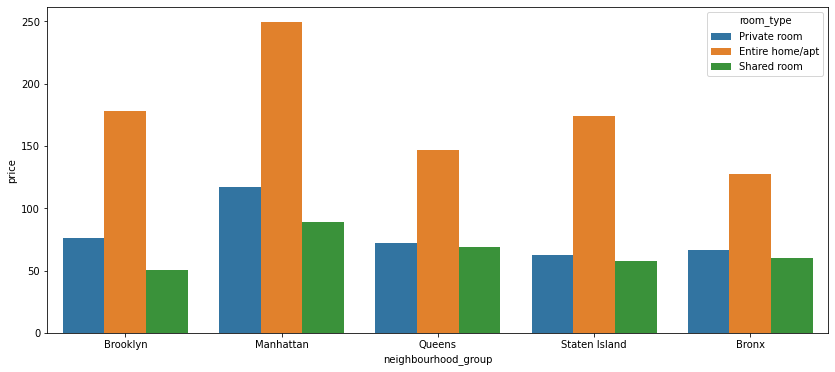

In [56]:
plt.figure(figsize=(14, 6))
sns.barplot(x=DataFile.neighbourhood_group, y=DataFile.price, hue=DataFile.room_type, ci=None)

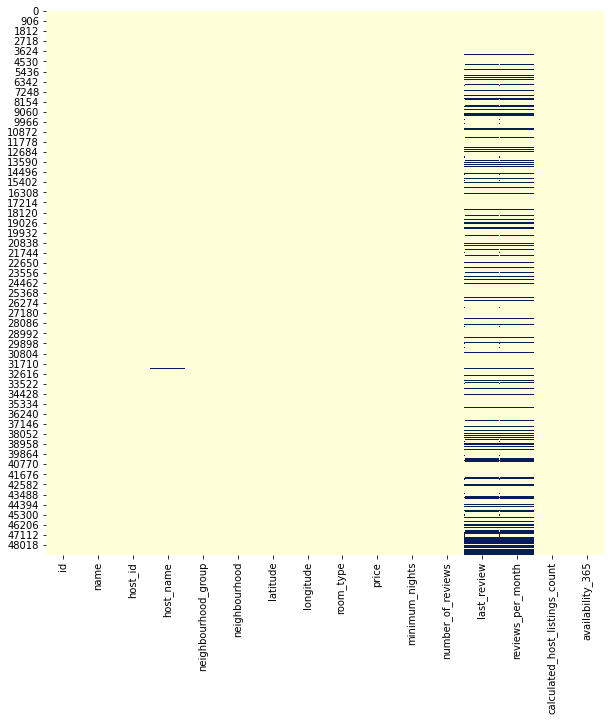

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(DataFile.isnull(),cbar=False,cmap='YlGnBu')
plt.ioff()

In [57]:
total = DataFile.isnull().sum().sort_values(ascending=False)
percent = ((DataFile.isnull().sum())*100)/DataFile.isnull().count().sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'], sort=False).sort_values('Total', ascending=False)
missing_data.head(40)

,Total,Percent
reviews_per_month,10052,20.558339
last_review,10052,20.558339
host_name,21,0.042949
name,16,0.032723
availability_365,0,0.000000
calculated_host_listings_count,0,0.000000
number_of_reviews,0,0.000000
minimum_nights,0,0.000000
price,0,0.000000
room_type,0,0.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

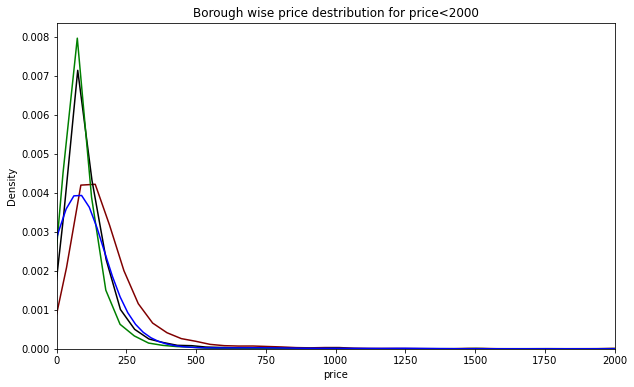

In [58]:
plt.figure(figsize=(10,6))
sns.distplot(DataFile[DataFile.neighbourhood_group=='Manhattan'].price,color='maroon',hist=False,label='Manhattan')
sns.distplot(DataFile[DataFile.neighbourhood_group=='Brooklyn'].price,color='black',hist=False,label='Brooklyn')
sns.distplot(DataFile[DataFile.neighbourhood_group=='Queens'].price,color='green',hist=False,label='Queens')
sns.distplot(DataFile[DataFile.neighbourhood_group=='Staten Island'].price,color='blue',hist=False,label='Staten Island')
sns.distplot(DataFile[DataFile.neighbourhood_group=='Long Island'].price,color='lavender',hist=False,label='Long Island')
plt.title('Borough wise price destribution for price<2000')
plt.xlim(0,2000)
plt.show()
plt.ioff()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


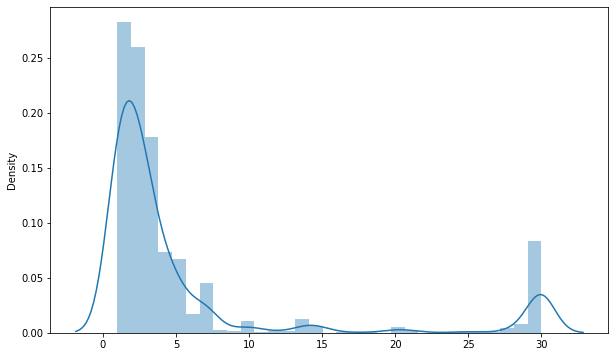

In [59]:
plt.figure(figsize=(10,6))
sns.distplot(DataFile[(DataFile['minimum_nights'] <= 30) & (DataFile['minimum_nights'] > 0)]['minimum_nights'], bins=31)
plt.show()
plt.ioff()

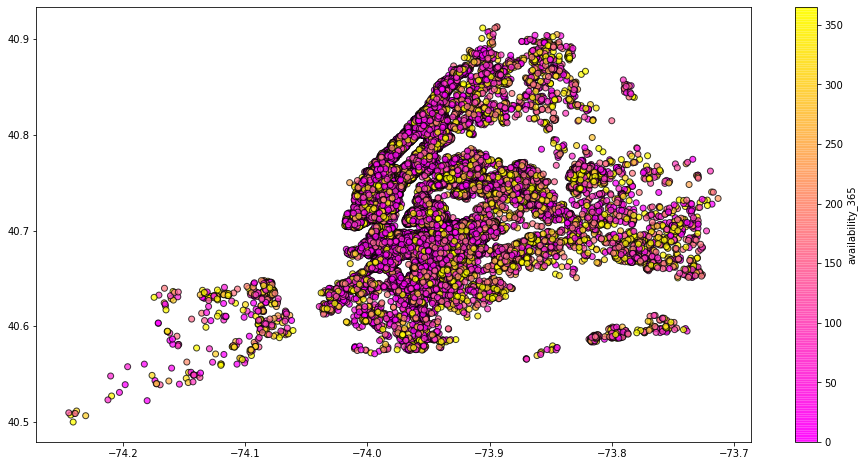

In [61]:
plt.figure(figsize=(16,8))
plt.scatter(DataFile.longitude, DataFile.latitude, c=DataFile.availability_365, cmap='spring', edgecolor='black'
  , linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('availability_365')

Text(0, 0.5, '')

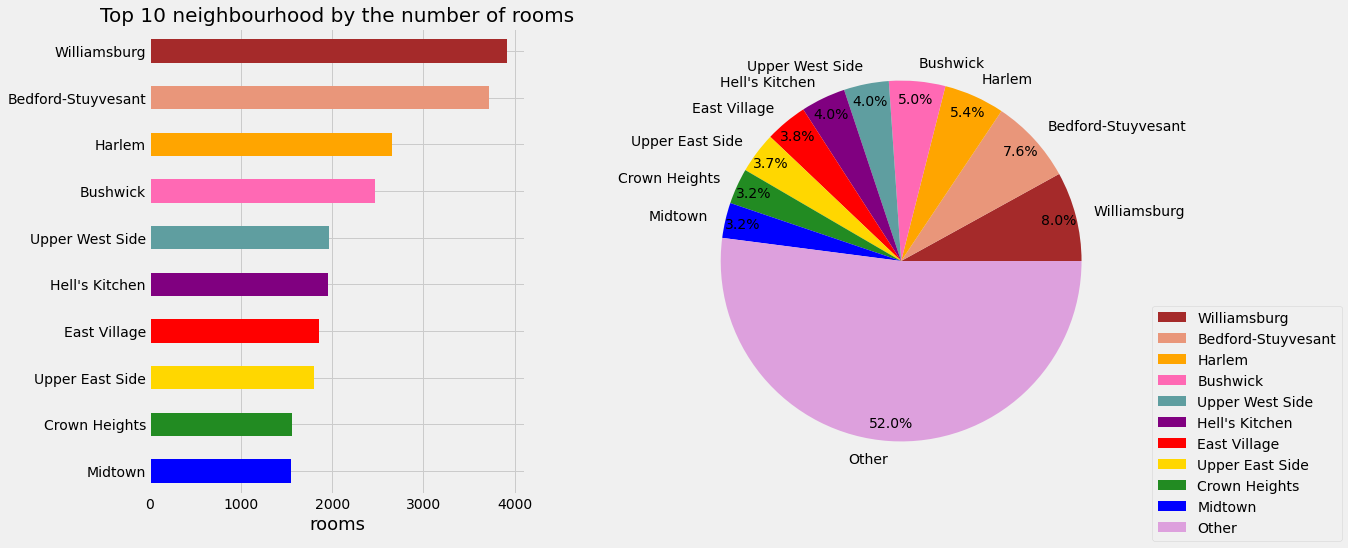

In [62]:
plt.style.use('fivethirtyeight')
fig,ax=plt.subplots(1,2,figsize=(15,8))
clr = ("blue", "forestgreen", "gold", "red", "purple",'cadetblue','hotpink','orange','darksalmon','brown')
DataFile.neighbourhood.value_counts().sort_values(ascending=False)[:10].sort_values().plot(kind='barh',color=clr,ax=ax[0])
ax[0].set_title("Top 10 neighbourhood by the number of rooms",size=20)
ax[0].set_xlabel('rooms',size=18)

count=DataFile['neighbourhood'].value_counts()
groups=list(DataFile['neighbourhood'].value_counts().index)[:10]
counts=list(count[:10])
counts.append(count.agg(sum)-count[:10].agg('sum'))
groups.append('Other')
type_dict=pd.DataFrame({"group":groups,"counts":counts})
clr1=('brown','darksalmon','orange','hotpink','cadetblue','purple','red','gold','forestgreen','blue','plum')
qx = type_dict.plot(kind='pie', y='counts', labels=groups,colors=clr1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[1])
plt.legend(loc=0, bbox_to_anchor=(1.15,0.4)) 
plt.subplots_adjust(wspace =0.5, hspace =0)
plt.ioff()
plt.ylabel('')

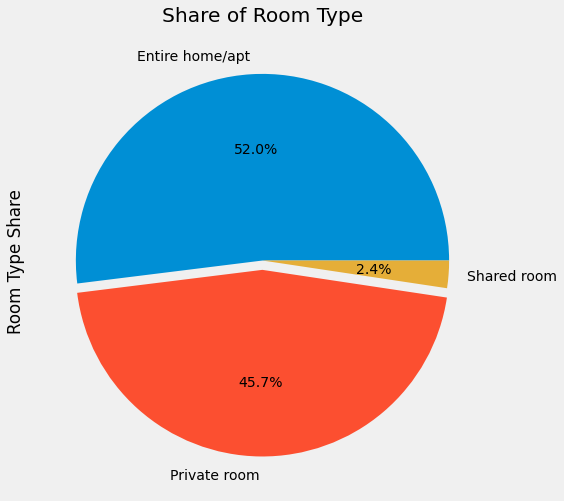

In [ ]:
f,ax=plt.subplots(1,1,figsize=(18,8))
DataFile['room_type'].value_counts().plot.pie(explode=[0,0.05,0],autopct='%1.1f%%')
ax.set_title('Share of Room Type')
ax.set_ylabel('Room Type Share')
plt.show()

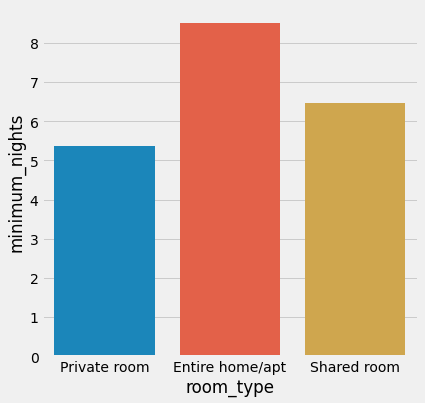

In [70]:
plt.figure(figsize=(6, 6))
sns.barplot(x=DataFile.room_type, y=DataFile.minimum_nights, ci=None)

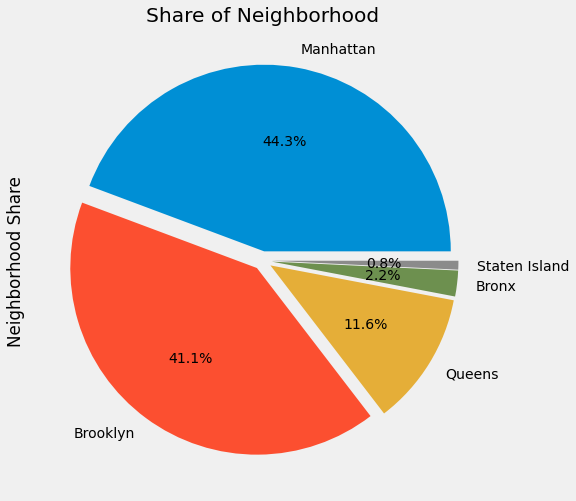

In [77]:
f,ax=plt.subplots(1,1,figsize=(18,8))
DataFile['neighbourhood_group'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0.05,0.05],autopct='%1.1f%%')
ax.set_title('Share of Neighborhood')
ax.set_ylabel('Neighborhood Share')

plt.show()
plt.ioff()

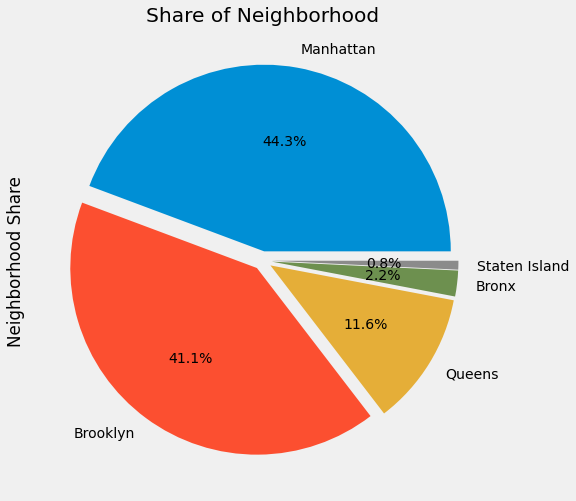

In [80]:
f,ax=plt.subplots(1,1,figsize=(18,8))
DataFile['neighbourhood_group'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0.05,0.05],autopct='%1.1f%%')
ax.set_title('Share of Neighborhood')
ax.set_ylabel('Neighborhood Share')
plt.show()
plt.ioff()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64


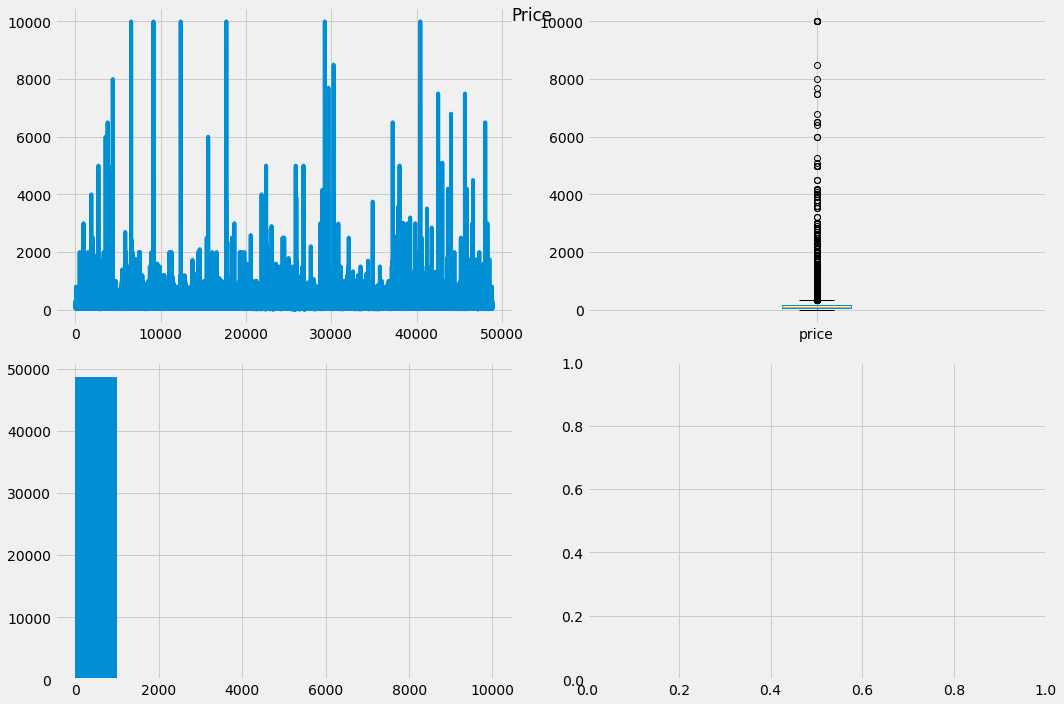

In [83]:
def plot_price_axes(df):
    print(df.describe()['price'])
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
    df['price'].plot(ax=ax[0][0])

    df.boxplot('price', ax=ax[0][1])
    plt.suptitle('Price')
    plt.tight_layout()

    df['price'].hist(ax=ax[1][0])
    plt.show()
plot_price_axes(DataFile)

If threshold = 1000, then 239 rows or 0.488803% would be dropped 
If threshold = 900, then 353 rows or 0.721955% would be dropped 
If threshold = 800, then 420 rows or 0.858984% would be dropped 
If threshold = 700, then 589 rows or 1.204622% would be dropped 
If threshold = 600, then 778 rows or 1.591165% would be dropped 
If threshold = 500, then 1044 rows or 2.135188% would be dropped 
If threshold = 400, then 1763 rows or 3.605686% would be dropped 
If threshold = 300, then 3357 rows or 6.865733% would be dropped 
count    44977.000000
mean       116.017520
std         63.095803
min          0.000000
25%         65.000000
50%        100.000000
75%        150.000000
max        299.000000
Name: price, dtype: float64


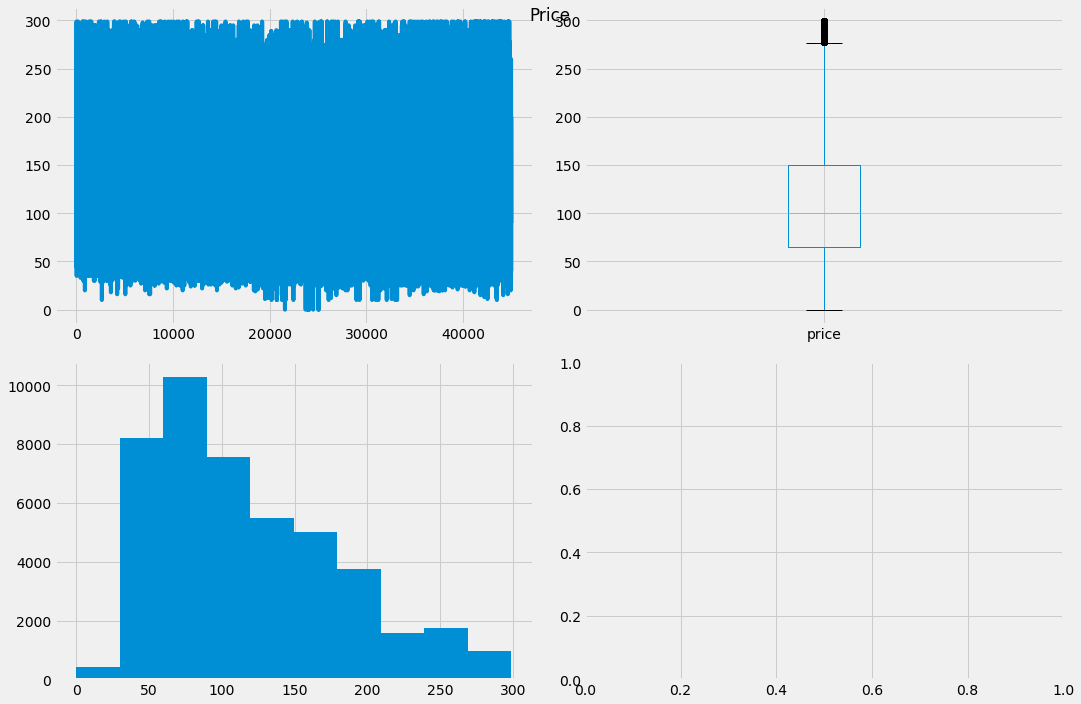

In [84]:
for threshold in range(1000, 200, -100):
    print('If threshold = {}, then {} rows or {:2%} would be dropped '.format(threshold, len(
        DataFile.loc[DataFile['price'] > threshold]), len(DataFile.loc[DataFile['price'] > threshold])/len(DataFile)))

plot_price_axes(DataFile.loc[DataFile['price'] < 300].reset_index(drop=True))

11


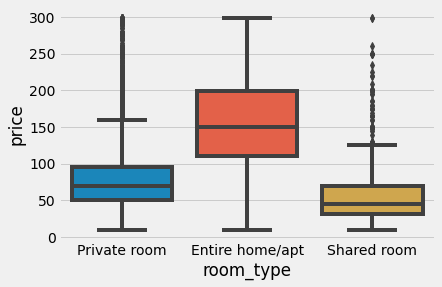

In [85]:
DataFile1 = DataFile.loc[DataFile['price'] < 300].reset_index(drop=True)

print(len(DataFile1.loc[DataFile1['price'] == 0]))
DataFile1 = DataFile1.loc[DataFile1['price'] != 0]

sns.boxplot(data=DataFile1, y='price', x='room_type', orient='v')
plt.show()